In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

Query Date:  2016-08-23


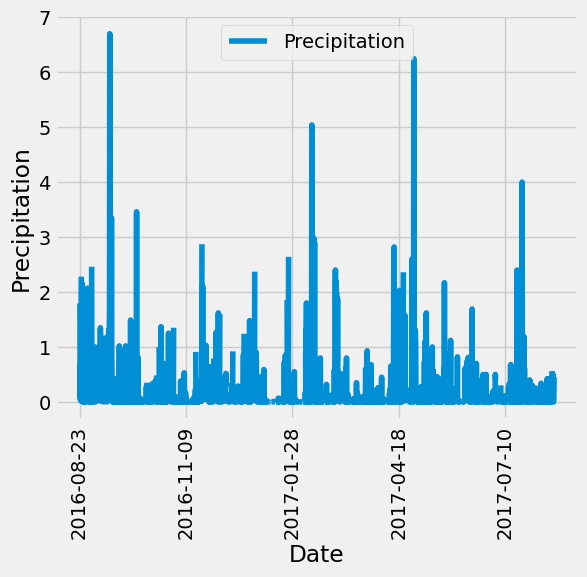

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
Query=session.query(measurement.date, measurement.prcp).filter(measurement.date >= query_date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_query=pd.DataFrame(Query, columns=["date","Precipitation"])
precipitation_query.set_index(("date"),inplace=True)
precipitation_query

# Sort the dataframe by date
sorted_prcp_data=precipitation_query.sort_values("date")
sorted_prcp_data

# Use Pandas Plotting with Matplotlib to plot the data
sorted_prcp_data.plot(figsize=(6,5), rot=90) 
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()

In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_prcp_data.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
engine.execute('SELECT * FROM station').fetchall()

# There are 9 total stations in the dataset

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = (session.query(measurement.station, func.count(measurement.id)).group_by(measurement.station)).order_by(func.count(measurement.id).desc()).all()
most_active 

# the most active station is USC00519281 with 2772

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# USC00519281
highest_temperature=session.query(measurement.station,func.max(measurement.tobs)).filter(measurement.station == "USC00519281").all()
highest_temperature   
lowest_temperature=session.query(measurement.station,func.min(measurement.tobs)).filter(measurement.station == "USC00519281").all()
lowest_temperature
average_temperature=session.query(measurement.station,func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()
average_temperature

print(f"The hightest temperature is {highest_temperature}")
print(f"The lowest temperature is {lowest_temperature}")
print(f"The hightest temperature is {average_temperature}")

The hightest temperature is [('USC00519281', 85.0)]
The lowest temperature is [('USC00519281', 54.0)]
The hightest temperature is [('USC00519281', 71.66378066378067)]


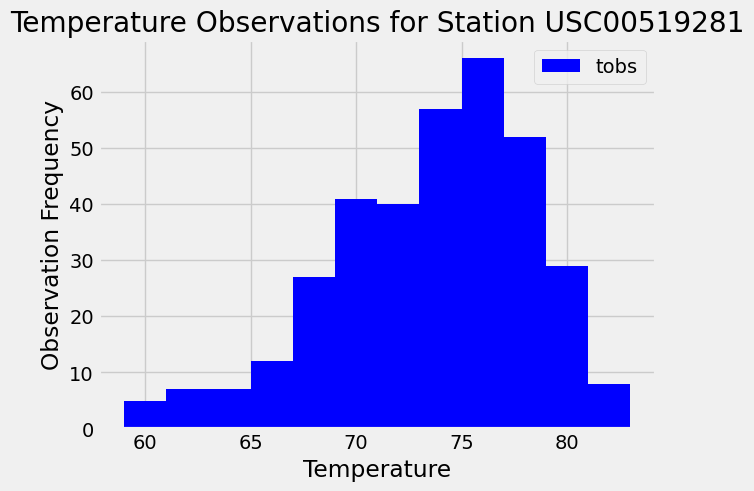

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_month_temp = session.query(Measurement.station, Measurement.tobs)\
    .filter(Measurement.date > '2016-08-23')\
    .filter(Measurement.date <= '2017-08-23')\
    .filter(Measurement.station == "USC00519281").all()
#twelve_month_temp

station_temp_df = pd.DataFrame(twelve_month_temp)
#station_temp_df

station_temp_df.plot.hist(bins=12, color="b")
plt.title("Temperature Observations for Station USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Observation Frequency")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()